**How to Use**

First, you need to load the pyemcee library, and define your function. For example: 

In [1]:
import pyemcee
import numpy as np

def myfunc21(input1):
   result1 = np.sum(input1)
   result2 = input1[1] ** input1[0]
   return [result1, result2]

Then, specify the upper and lower uncertainties of the prior parameters:

In [2]:
input1 = np.array([1., 2.])
input1_err = np.array([0.2, 0.5])
input1_err_p = input1_err
input1_err_m = -input1_err
output1 = myfunc21(input1)
output1_num = len(output1)

Choose the appropriate uncertainty distribution. For example, for a uniform distribution, use_gaussian=0, and for a Gaussian distribution, use_gaussian=1. Then, specify the number of walkers and the number of iterations, e.g. walk_num=30 and iteration_num=100. ou can then create the MCMC sample and propagate the uncertainties of the input parameters into your defined functions as follows::

In [3]:
use_gaussian=0 # uniform distribution from min value to max value
walk_num=30 # number of walkers
iteration_num=100 # number of samplers
mcmc_sim = pyemcee.hammer(myfunc21, input1, input1_err_m,
                          input1_err_p, output1, walk_num,
                          iteration_num, use_gaussian)

Sim loop: 0
Sim loop: 1
Sim loop: 2
Sim loop: 3
Sim loop: 4
Sim loop: 5
Sim loop: 6
Sim loop: 7
Sim loop: 8
Sim loop: 9
Sim loop: 10
Sim loop: 11
Sim loop: 12
Sim loop: 13
Sim loop: 14
Sim loop: 15
Sim loop: 16
Sim loop: 17
Sim loop: 18
Sim loop: 19
Sim loop: 20
Sim loop: 21
Sim loop: 22
Sim loop: 23
Sim loop: 24
Sim loop: 25
Sim loop: 26
Sim loop: 27
Sim loop: 28
Sim loop: 29
Sim loop: 30
Sim loop: 31
Sim loop: 32
Sim loop: 33
Sim loop: 34
Sim loop: 35
Sim loop: 36
Sim loop: 37
Sim loop: 38
Sim loop: 39
Sim loop: 40
Sim loop: 41
Sim loop: 42
Sim loop: 43
Sim loop: 44
Sim loop: 45
Sim loop: 46
Sim loop: 47
Sim loop: 48
Sim loop: 49
Sim loop: 50
Sim loop: 51
Sim loop: 52
Sim loop: 53
Sim loop: 54
Sim loop: 55
Sim loop: 56
Sim loop: 57
Sim loop: 58
Sim loop: 59
Sim loop: 60
Sim loop: 61
Sim loop: 62
Sim loop: 63
Sim loop: 64
Sim loop: 65
Sim loop: 66
Sim loop: 67
Sim loop: 68
Sim loop: 69
Sim loop: 70
Sim loop: 71
Sim loop: 72
Sim loop: 73
Sim loop: 74
Sim loop: 75
Sim loop: 76
Sim loop:

To determine the upper and lower errors of the function outputs, you need to run with the chosen appropriate confidence level. For example, a 1.645-sigma standard deviation can be specified with clevel=0.90. For a 1-sigma standard deviation, we have clevel=0.682:

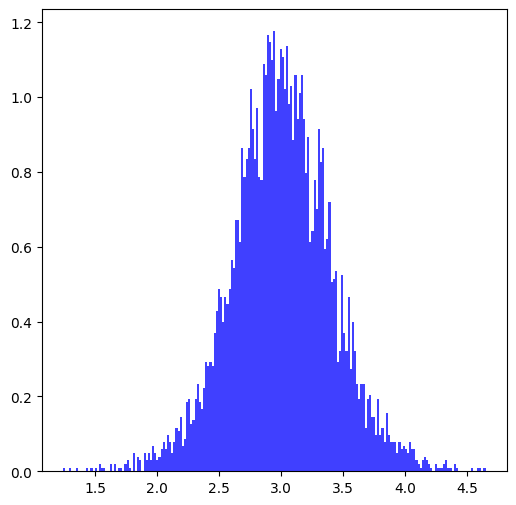

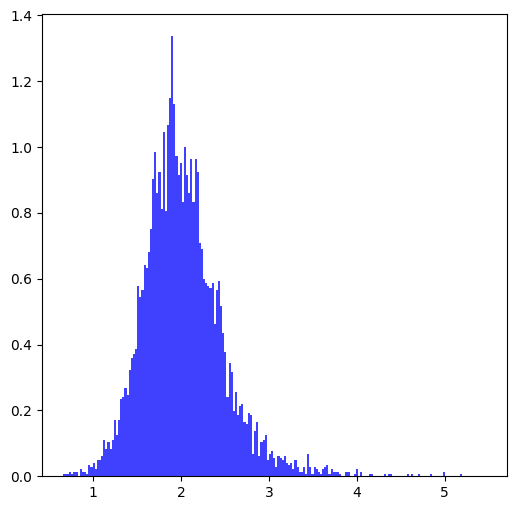

In [4]:
clevel=0.68268949 # 1-sigma
output1_error = pyemcee.find_errors(output1, mcmc_sim, clevel, do_plot=1)

To prevent plotting, you should set do_plot=None. To print the results:

In [5]:
for i in range(0, output1_num):
   print(output1[i], output1_error[i,:])

3.0 [-0.37204844  0.38244121]
2.0 [-0.40288661  0.41962183]
